In [40]:
#importing libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [31]:
# read data 
df=pd.read_csv("titanic-passengers.csv", sep=";")
# Preprocessing data

def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,NaN,S


In [72]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#applying tree algorithm
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'best', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 3)
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


In [35]:
x


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.000000,0,0,13.0000
1,76,3,1,25.000000,0,0,7.6500
2,641,3,1,20.000000,0,0,7.8542
3,568,3,0,29.000000,0,4,21.0750
4,672,1,1,31.000000,1,0,52.0000
...,...,...,...,...,...,...,...
886,10,2,0,14.000000,1,0,30.0708
887,61,3,1,22.000000,0,0,7.2292
888,535,3,0,30.000000,0,0,8.6625
889,102,3,1,29.699118,0,0,7.8958


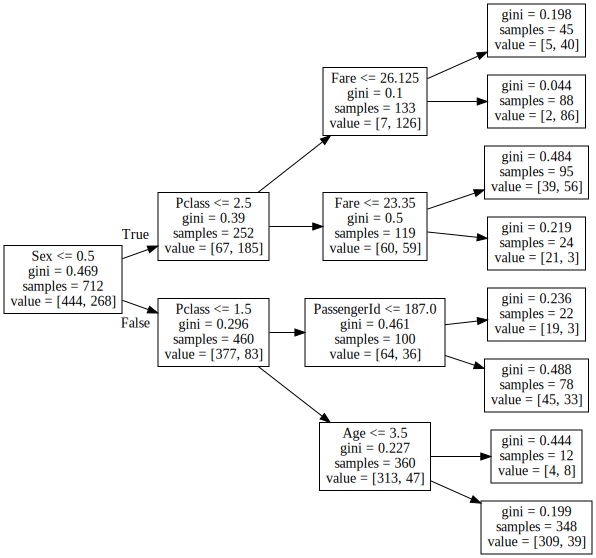

In [71]:
#Plot the decision tree
import graphviz
# DOT format
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names = x.columns.values, rotate=True)

# Draw graph
graph = graphviz.Source(dot_data) 
graph.render("data")
graph

In [ ]:
"""When sex is less or equal to 0.5 (moste female gendre) and if the Pclass is less or equal to 2.5 (moste high class) 
and if Fare is less or equal to 26.125 than the passenger is survived """

score:0.7988826815642458


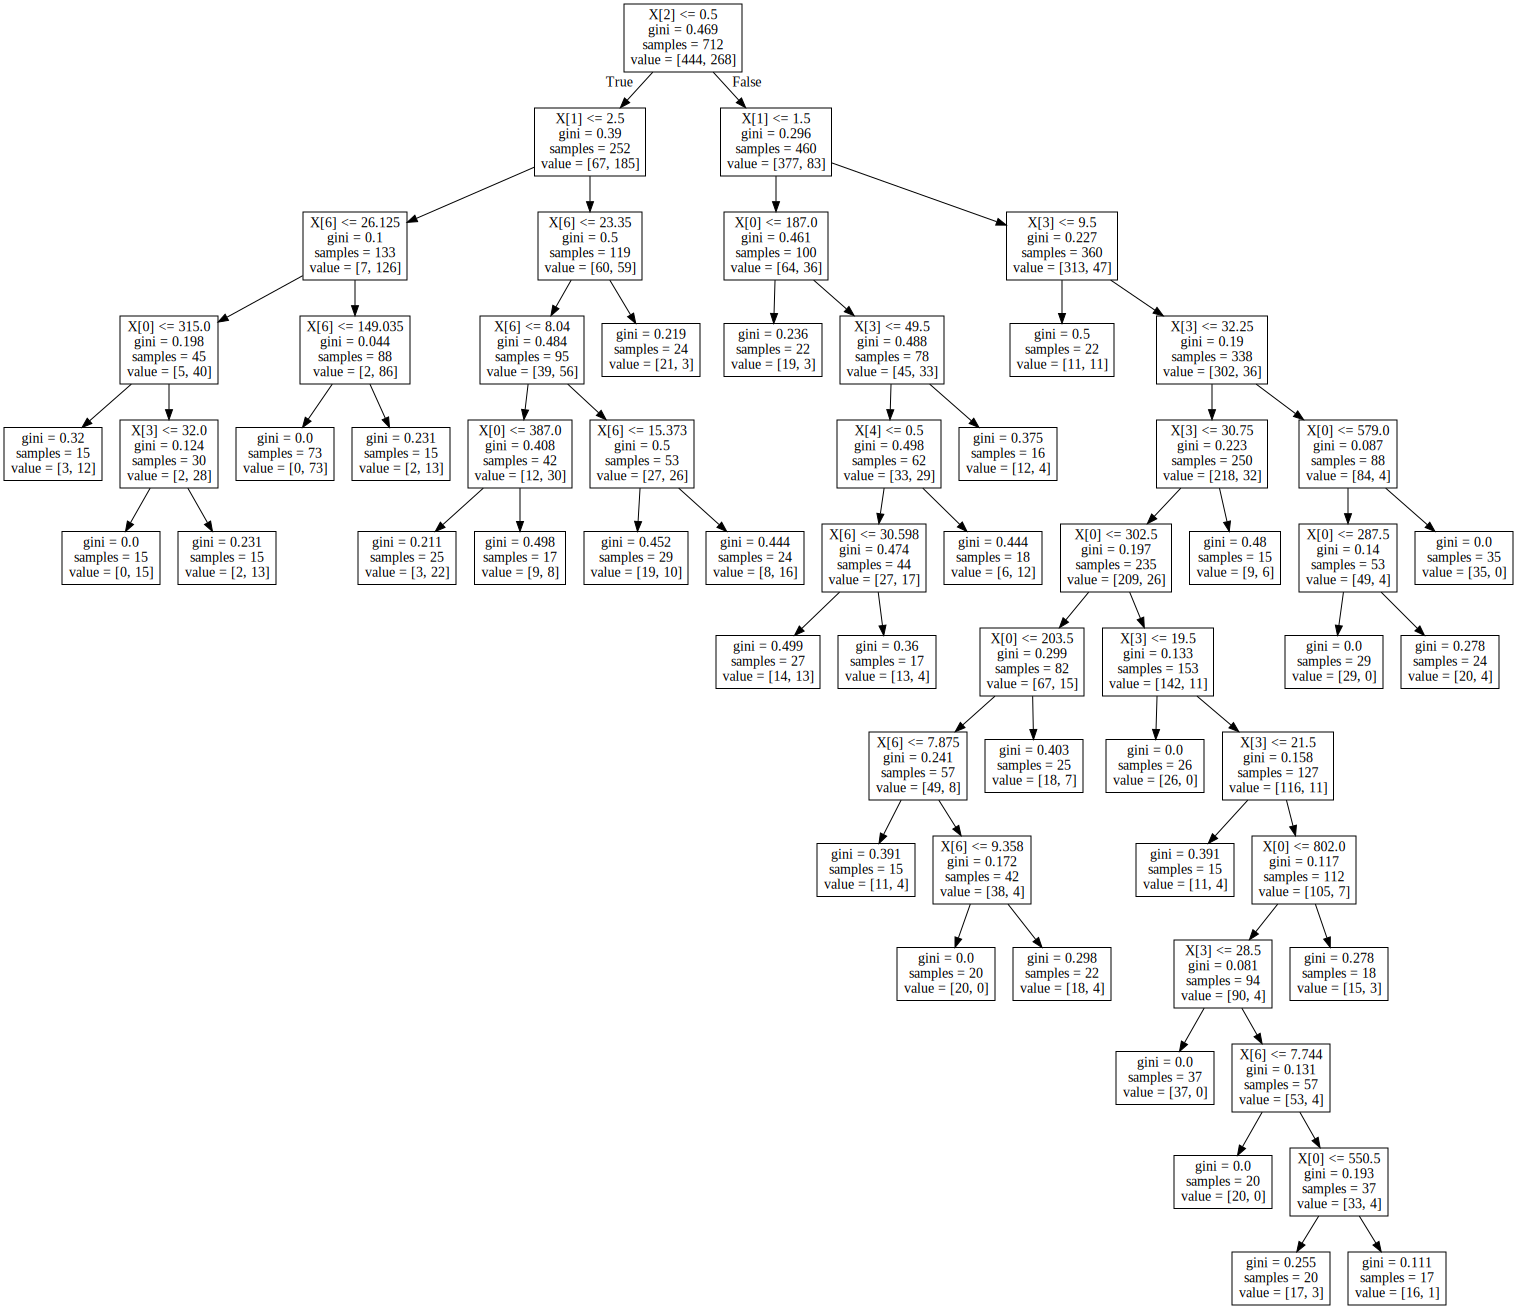

In [76]:
# Change the decision tree parameters
tree2 = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'best', max_leaf_nodes = 80,min_samples_leaf = 15,max_depth= 15)
tree2.fit(x_train, y_train)   #fitting our model
y_pred=tree2.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

import graphviz
# DOT format
dot_data = tree.export_graphviz(tree2, out_file=None)

# Draw graph
graph = graphviz.Source(dot_data) 
graph.render("data")
graph

In [ ]:
"""the two accurancy are almost similar (0.79) """

In [65]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8324022346368715


In [ ]:
""" the accuracy is improved with the Random Forest"""

In [66]:
clf2=RandomForestClassifier(n_estimators=30)  #Creating a random forest with 10 decision trees
clf2.fit(x_train, y_train)  #Training our model
y_pred=clf2.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8435754189944135


In [ ]:
"""the two accurancy are almost similar (0.84) """